## 라이브러리 로드

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family = "AppleGothic")
plt.rc("axes", unicode_minus = False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


## 파일로드

In [56]:
%ls ../data

seoul_municipalities_geo_simple.json
전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv*
상가업소정보_201912_01.csv
주택도시보증공사_전국 평균 분양가격(2019년 12월).csv*
전국도시공원표준데이터.csv


In [99]:
# '|'로 구분자 지정해야하는 파일
df = pd.read_csv("../data/상가업소정보_201912_01.csv", sep = "|")

In [100]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 50

## 미리보기


In [101]:
# 데이터 사이즈 및 head로 미리보기
print(df.shape)
df.head(2)

(573680, 39)


상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09     유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12   커피점/카페   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드   표준산업분류명  시도코드    시도명  시군구코드 시군구명  \
0    Q09A01        호프/맥주   I56219    기타 주점업    11  서울특별시  11680  강남구   
1    Q12A01  커피전문점/카페/다방   I56220  비알콜 음료점업    11  서울특별시  11680  강남구   

        행정동코드  행정동명       법정동코드 법정동명                 지번코드  대지구분코드 대지구분명  \
0  1168060000  대치1동  1168010600  대치동  1168010600206040000       1    대지   
1  1168064000  역삼1동  1168010100  역삼동  1168010100206960042       1    대지   

   지번본번지  지번부번지                  지번주소         도로명코드               도로명  건물본번지  \
0    604    NaN     서울특별시 강남구 대치동 604  116802000003   서울특별시 강남구 남부순환로   2933   
1    696   42.0  서울특별시 강남구 역삼동 696-42  116804166502  서울특별시 강남구 선릉로93길      6   

   건물부번지                     건물관리번호   건물명                 도로명주소   구우편번호  \
0    NaN  1168010600106040000014378  대치상가  서울특별시 강남구 남부순환로 2933  135280   
1    NaN  1168010100106960042022041   NaN    서울특별시 강남구 선릉로93길 6  135080   

    신우편번호  동정보 층정보  호정보          경도         위도  
0  6280.0  NaN   1  NaN  127.061026  37.493922  
1  6149.0  NaN   1  NaN  127.047883  37.505675

In [102]:
# info 로 데이터프레임의 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

# 결측치 확인 & 전처리

In [103]:
# 결측치가 많은 칼럼 정리
n = df.isna().sum().sort_values(ascending = False)
not_use = n.loc[n > 10]
not_use

동정보         522824
건물부번지       501692
지점명         497006
호정보         488414
건물명         308072
층정보         226553
지번부번지        98756
표준산업분류명      34390
표준산업분류코드     34390
dtype: int64

In [104]:
not_use_col = not_use.index
df = df.drop(not_use_col, axis = 1)
df.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
0  19905471  와라와라호프         Q       음식       Q09     유흥주점    Q09A01    호프/맥주   

   시도코드    시도명  시군구코드 시군구명       행정동코드  행정동명       법정동코드 법정동명  \
0    11  서울특별시  11680  강남구  1168060000  대치1동  1168010600  대치동   

                  지번코드  대지구분코드 대지구분명  지번본번지               지번주소         도로명코드  \
0  1168010600206040000       1    대지    604  서울특별시 강남구 대치동 604  116802000003   

               도로명  건물본번지                     건물관리번호                 도로명주소  \
0  서울특별시 강남구 남부순환로   2933  1168010600106040000014378  서울특별시 강남구 남부순환로 2933   

    구우편번호   신우편번호          경도         위도  
0  135280  6280.0  127.061026  37.493922

In [105]:
# 분석에 사용하지 않을 칼럼 다시 정리
a = list(df.columns)
b = ["경도", "위도", "건물본번지", "지번본번지", "시도명","상권업종대분류명", "상권업종중분류명", "시군구명", "시도명", "상호명", "상권업종소분류명"]
not_use_col2 = [x for x in a if x not in b]
not_use_col2

['상가업소번호',
 '상권업종대분류코드',
 '상권업종중분류코드',
 '상권업종소분류코드',
 '시도코드',
 '시군구코드',
 '행정동코드',
 '행정동명',
 '법정동코드',
 '법정동명',
 '지번코드',
 '대지구분코드',
 '대지구분명',
 '지번주소',
 '도로명코드',
 '도로명',
 '건물관리번호',
 '도로명주소',
 '구우편번호',
 '신우편번호']

In [106]:
# shape를 통해 정리 전후의 데이터 프레임 모양을 확인
print(df.shape)
df = df.drop(not_use_col2, axis = 1)
df.shape

(573680, 30)


(573680, 10)

## 위경도 데이터 탐색

In [79]:
# 위경도 데이터 describe 보기
df[["위도", "경도"]].describe()

위도             경도
count  573680.000000  573680.000000
mean       36.854698     127.596287
std         1.081285       0.941262
min        35.006760     126.768169
25%        35.215422     126.968316
50%        37.511207     127.047672
75%        37.560362     128.986938
max        37.692398     129.292243

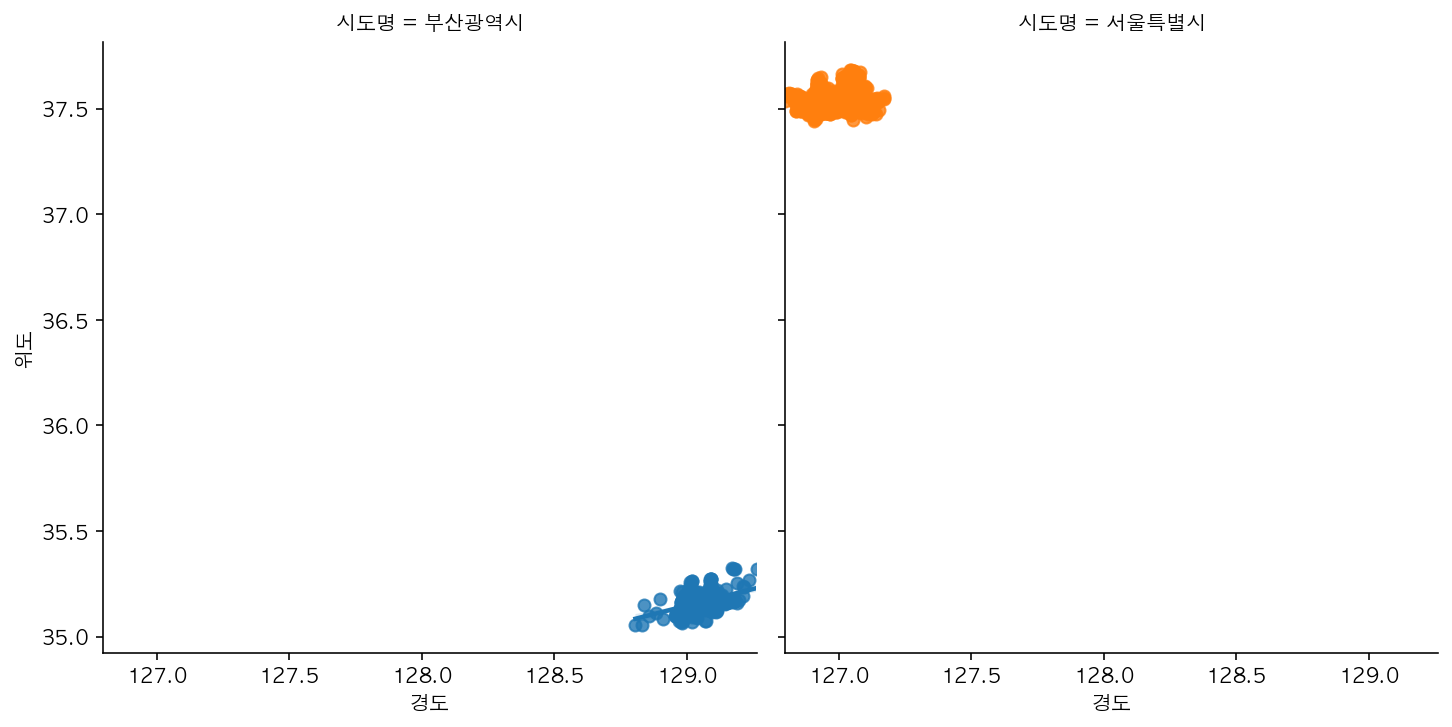

In [80]:
# scatterplot 으로 경도와 위도를 표현
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개 샘플 추출
sns.lmplot(data = df.sample(1000), x = "경도", y = "위도", hue = "시도명", col = "시도명")

# 2개의 덩어리로 나눠진 것이 시도명 때문임을 확인
# 서울 데이터만 가져오려면 시군구명에서 필터링을 해야함을 알 수 있음

# 강남구의 음식점 분포 분석

In [131]:
# "시도명"이 "서울특별시" 이고 "상권업종대분류명" 이 "음식" 에 대한 서브셋만 가져와서 df_seoul_food 에 담기
df_seoul_food = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "음식")].copy()
df_seoul_food.shape

(132889, 10)

In [147]:
# "시군구명", "상권업종중분류명" 으로 그룹화 해서 상점수를 카운트
food_gu = df_seoul_food.groupby(["시군구명","상권업종중분류명"])["상호명"].count()
food_gu

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
                  ... 
중랑구   제과제빵떡케익      160
      중식            78
      커피점/카페       311
      패스트푸드        127
      한식          1251
Name: 상호명, Length: 348, dtype: int64

In [137]:
# reset_index()를 통해 데이터 프레임으로 만들어주고 칼럼명을 정리
food = food_gu.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food.head()

시군구명 상권업종중분류명   상호수
0  강남구    기타음식업    47
1  강남구   닭/오리요리   539
2  강남구  별식/퓨전요리   341
3  강남구       부페    63
4  강남구       분식  1197

In [153]:
# 시군구가 강남인 데이터만 분류
food_gangnam = food[food["시군구명"] == "강남구"].sort_values("상호수", ascending = False)

<AxesSubplot:xlabel='상권업종중분류명', ylabel='상호수'>

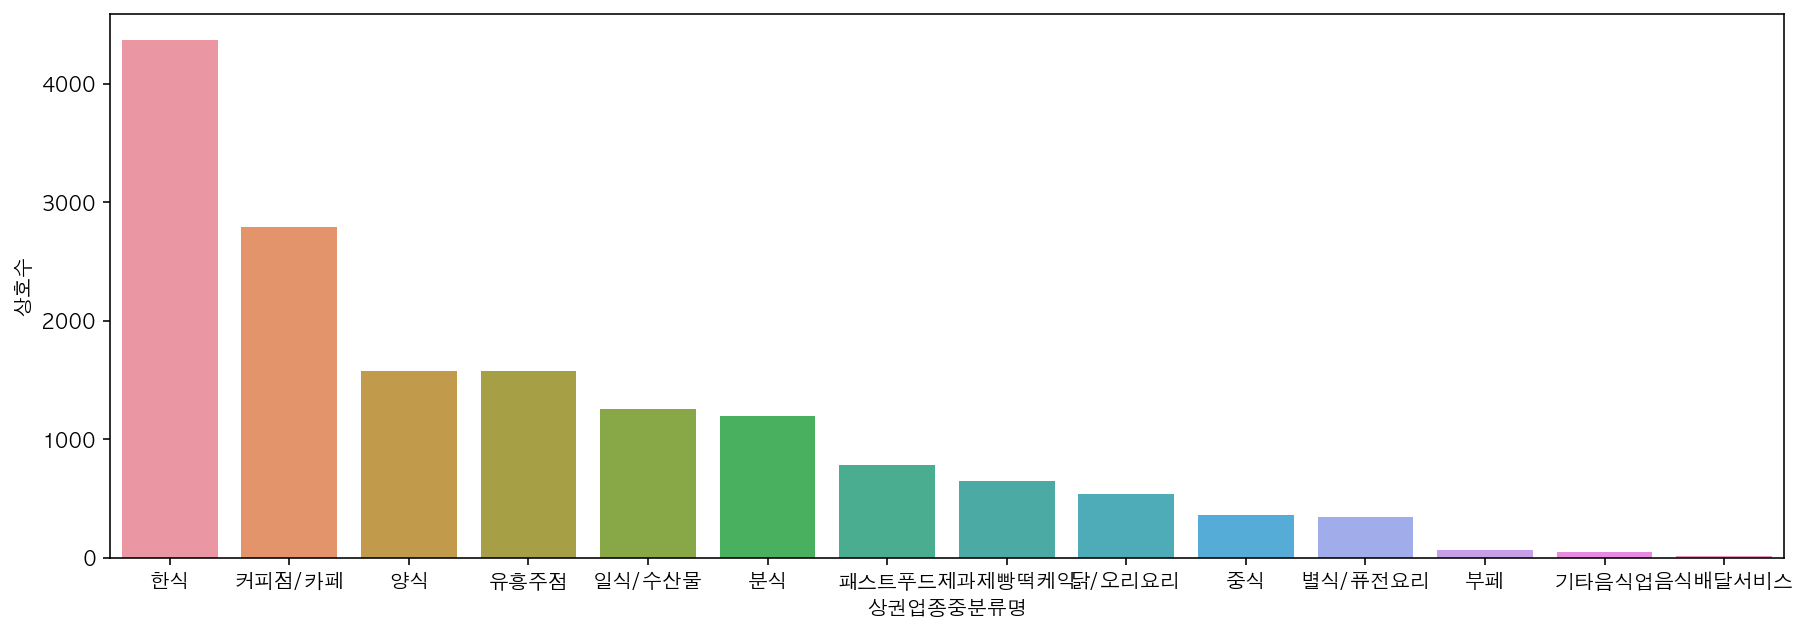

In [154]:
# 바플롯으로 강남구의 상권업종 분포 시각화
plt.figure(figsize = (15,5))
sns.barplot(data=food_gangnam, x="상권업종중분류명", y="상호수")

# 구별 학원수 비교
* 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
* 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데 이 지역에 학원이 많이 분포 되어 있는지 알아봅니다.

## 서브셋 만들고 집계하기

In [161]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 값들을 조회
df["상권업종대분류명"].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

In [162]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육" 인 데이터를 서브셋으로 저장
df_academy = df[(df["시도명"] =="서울특별시")& (df["상권업종대분류명"]== "학문/교육")].copy()
df_academy.head()

상호명 상권업종대분류명    상권업종중분류명   상권업종소분류명    시도명 시군구명  지번본번지  건물본번지  \
85   GIA보석교육원    학문/교육  학원-자격/국가고시    학원-보석감정  서울특별시  강남구    639    320   
101     안재형영어    학문/교육       학원-어학  학원-외국어/어학  서울특별시  양천구    905    133   
121       정아트    학문/교육   학원-음악미술무용   서예/서화/미술  서울특별시  강서구    184     21   
126     경찰태권도    학문/교육   학원-예능취미체육       태권도장  서울특별시  성북구   1283     20   
134   아트인스튜디오    학문/교육   학원-음악미술무용   서예/서화/미술  서울특별시  강남구    818     12   

             경도         위도  
85   127.036437  37.528532  
101  126.875973  37.531592  
121  126.873645  37.550924  
126  127.023020  37.604749  
134  127.028054  37.499729

In [167]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산
academy_group = df_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
academy_group

시군구명  상권업종소분류명   
강남구   검도도장             9
      고시원            139
      놀이방              8
      독서실            125
      서예/서화/미술       219
                    ... 
중랑구   학원-입시          172
      학원-주산암산부기속셈      7
      학원-펜글씨/한문        1
      학원/국가고시          2
      합기도장             2
Name: 상호명, Length: 1118, dtype: int64

In [171]:
# reset_index()를 통해 데이터 프레임으로 만들어주고 칼럼명을 정리
academy_gu = academy_group.reset_index()
academy_gu = academy_gu.rename(columns = {"상호명":"상호수"})
academy_gu.head()

시군구명  상권업종소분류명  상호수
0  강남구      검도도장    9
1  강남구       고시원  139
2  강남구       놀이방    8
3  강남구       독서실  125
4  강남구  서예/서화/미술  219

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

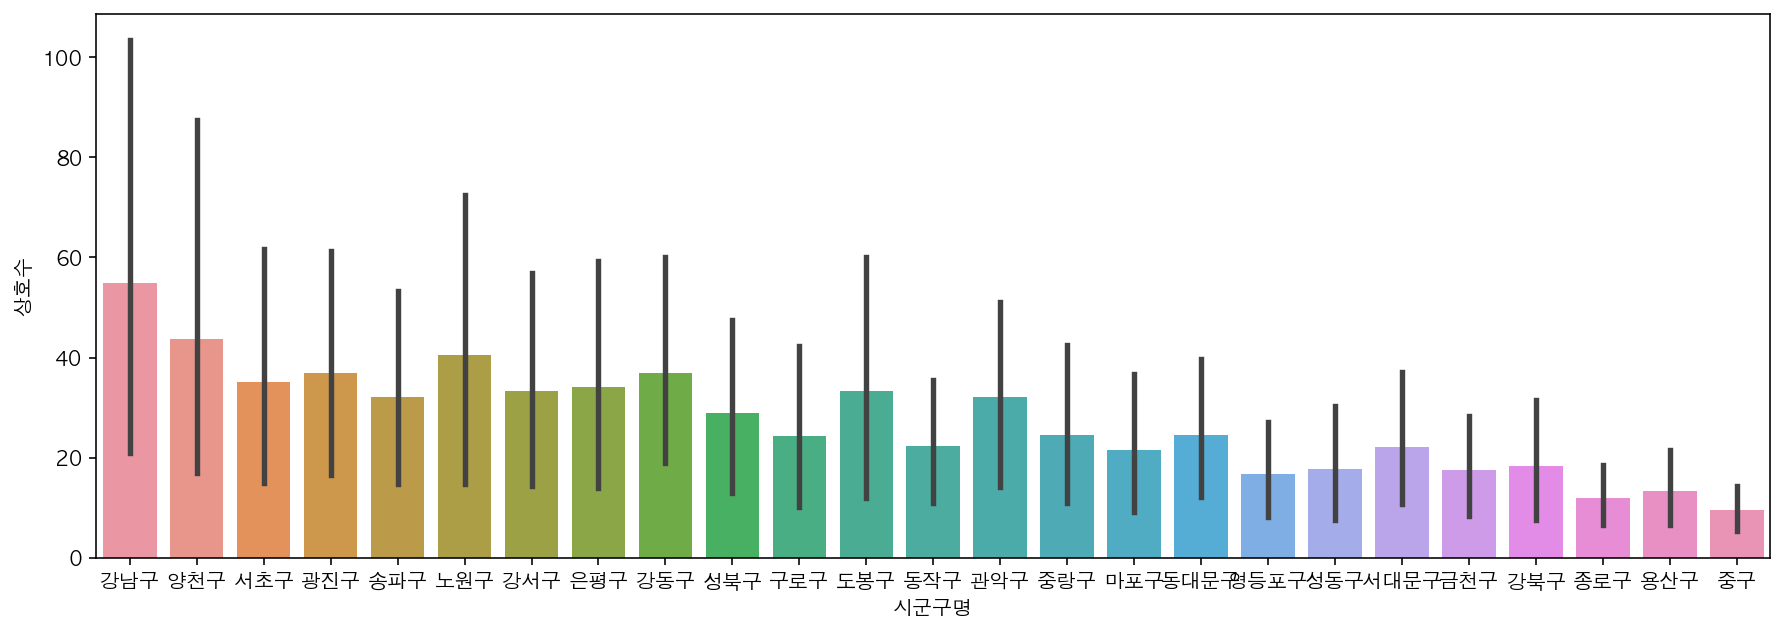

In [175]:
# barplot으로 시군구별 학원 분포를 조회
plt.figure(figsize = (15,5))
sns.barplot(
    data = academy_gu.sort_values("상호수", ascending = False),
    x = "시군구명",
    y = "상호수",
)


## isin 을 사용해 서브셋 만들기

In [182]:
# 빈도수가 1000개 이상인 소분류명 데이터만 따로 보기위해 분류
academy_count = df_academy["상권업종소분류명"].value_counts()
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [183]:
# isin을 통해 academy_count_1000의 인덱스 안에 있는 데이터만 따로 서브셋을 만듬
print(df_academy.shape)
df_academy_selected = df_academy[df_academy["상권업종소분류명"].isin(academy_count_1000.index)]
df_academy_selected.shape

(31509, 10)


(26630, 10)

## 시각화로 지역별 분포 확인하기

<AxesSubplot:ylabel='시군구명'>

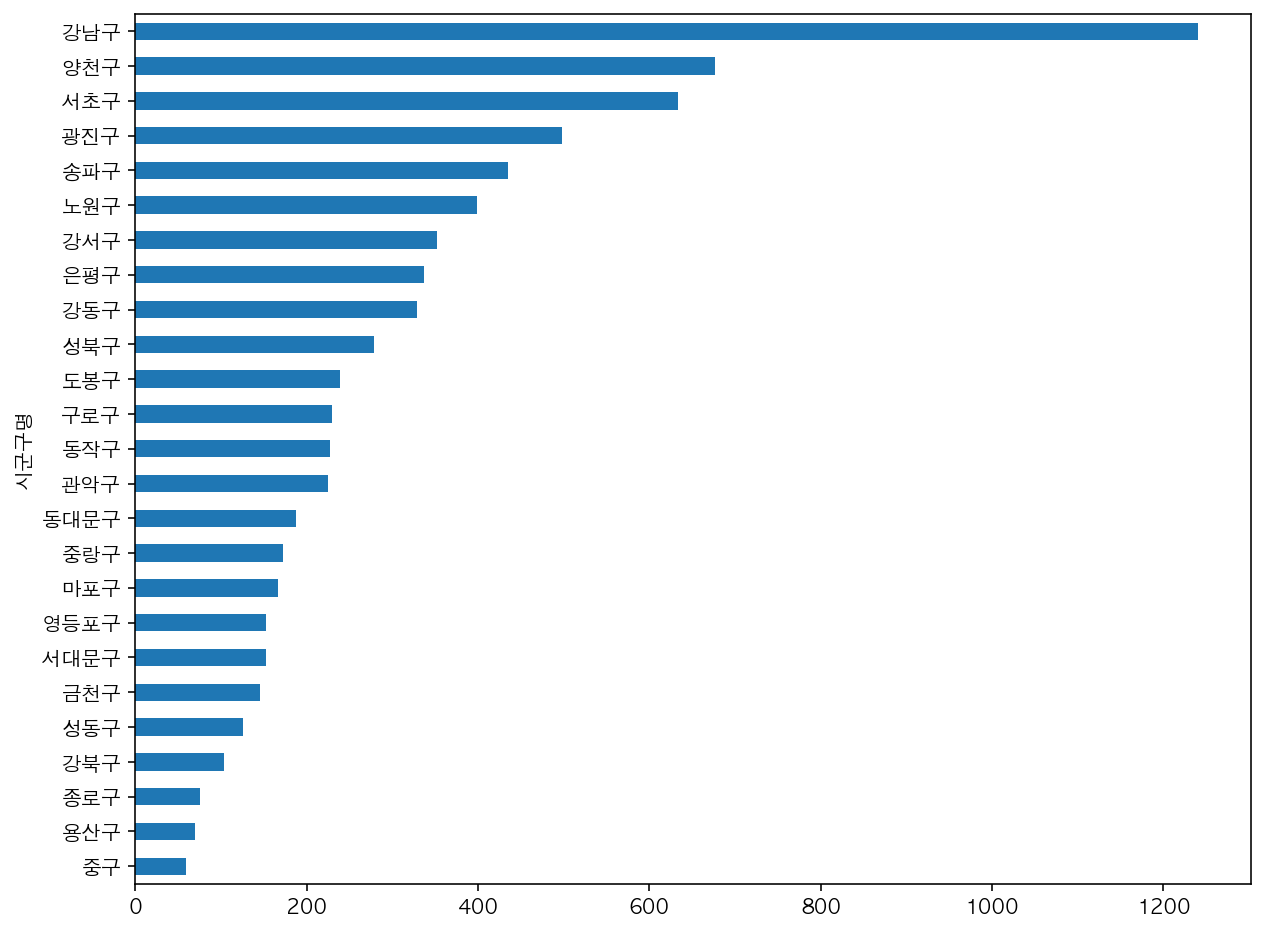

In [187]:
# "상권업종소분류명", "시군구명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산
g = df_academy_selected.groupby(["상권업종소분류명","시군구명"])["상호명"].count()
g.loc["학원-입시"].sort_values().plot.barh(figsize = (10,8))

<AxesSubplot:xlabel='시군구명'>

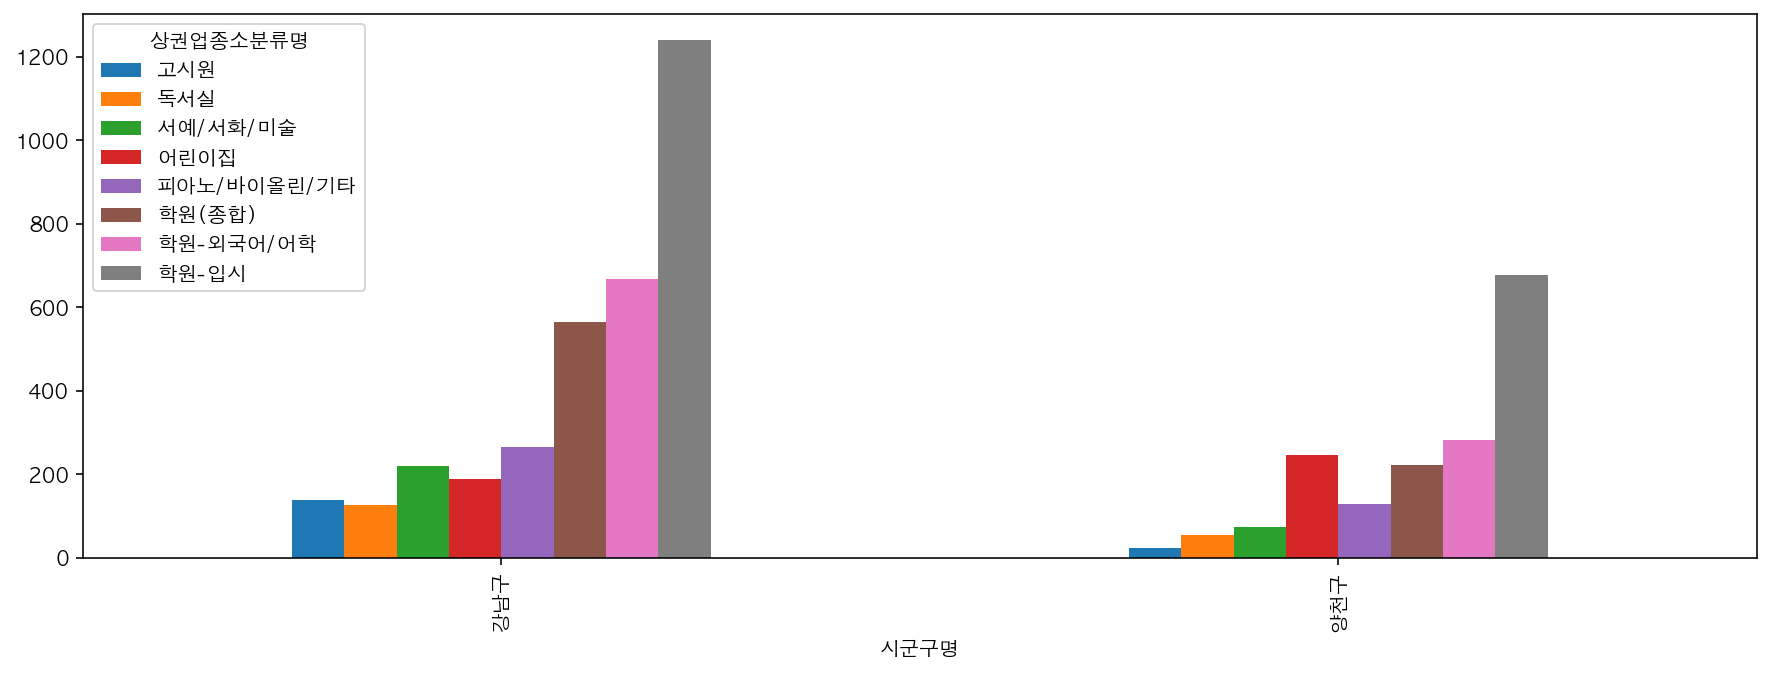

In [210]:
#  강남구와 양천구만 분류해서 카테고리별 분포 비교
g.unstack()[["강남구","양천구"]].T.plot.bar(figsize = (15,5))

In [212]:
# reset_index()를 통해 데이터 프레임으로 만들어주고 칼럼명을 정리
t = g.reset_index()
t = t.rename(columns = {"상호명":"상호수"})
t

상권업종소분류명 시군구명  상호수
0        고시원  강남구  139
1        고시원  강동구   62
2        고시원  강북구   11
3        고시원  강서구   32
4        고시원  관악구   83
..       ...  ...  ...
195    학원-입시  용산구   70
196    학원-입시  은평구  337
197    학원-입시  종로구   75
198    학원-입시   중구   59
199    학원-입시  중랑구  172

[200 rows x 3 columns]

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

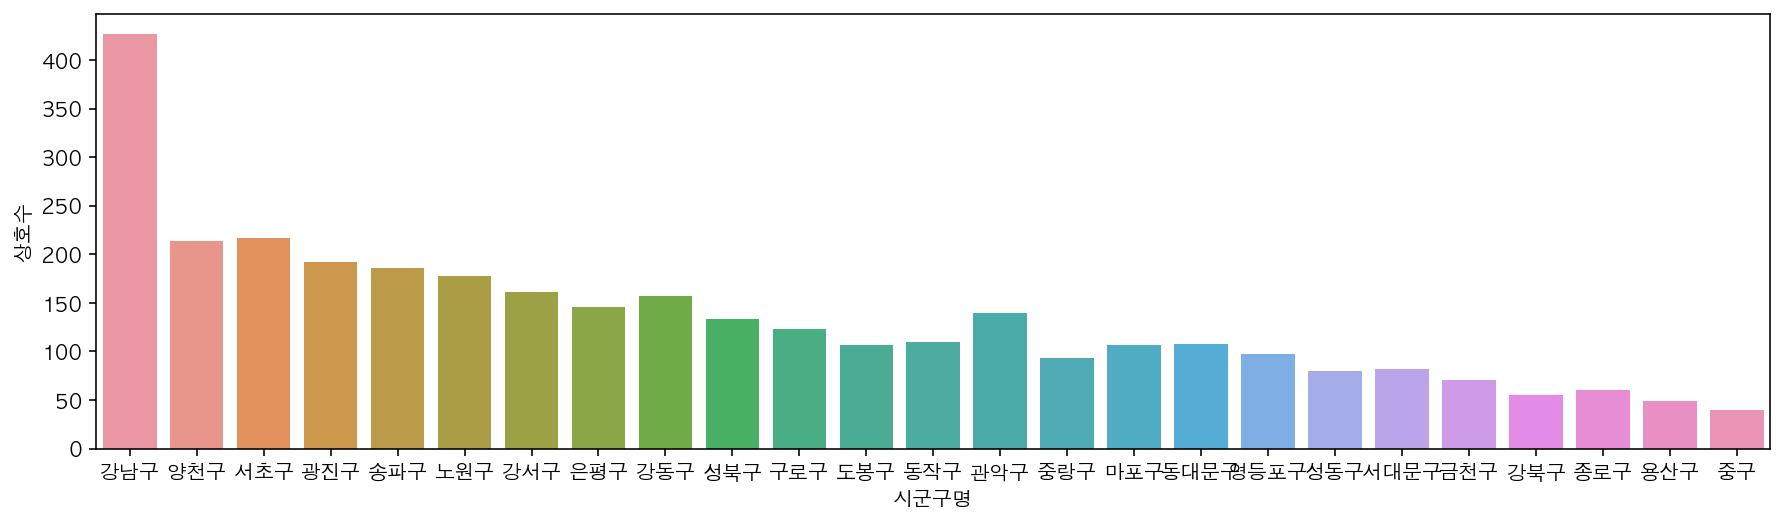

In [227]:
# seaborn으로 바플롯 시각화
plt.figure(figsize = (15,4))
sns.barplot(
    data = t.sort_values("상호수", ascending = False),
    x = "시군구명",
    y = "상호수",
    ci = None,

)

<AxesSubplot:xlabel='상권업종소분류명', ylabel='상호수'>

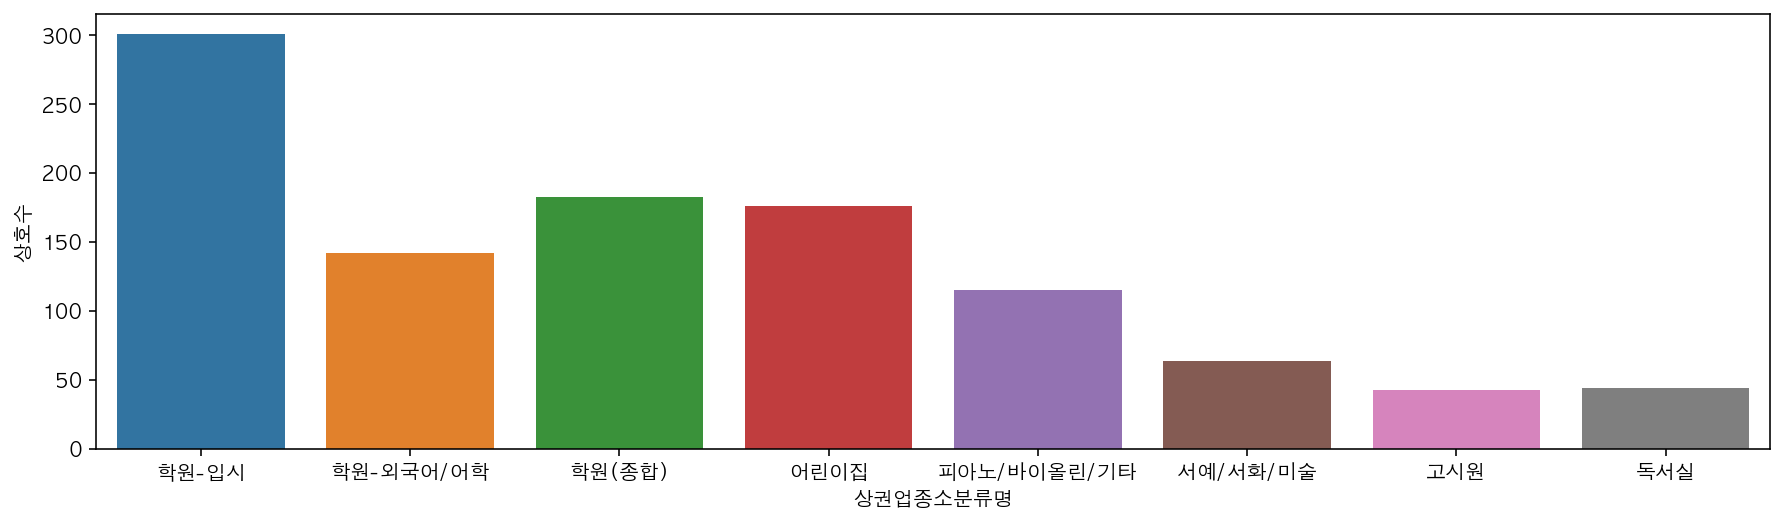

In [222]:
plt.figure(figsize = (15,4))
sns.barplot(
    data = t.sort_values("상호수", ascending = False),
    x = "상권업종소분류명",
    y = "상호수",
    ci = None,
)

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

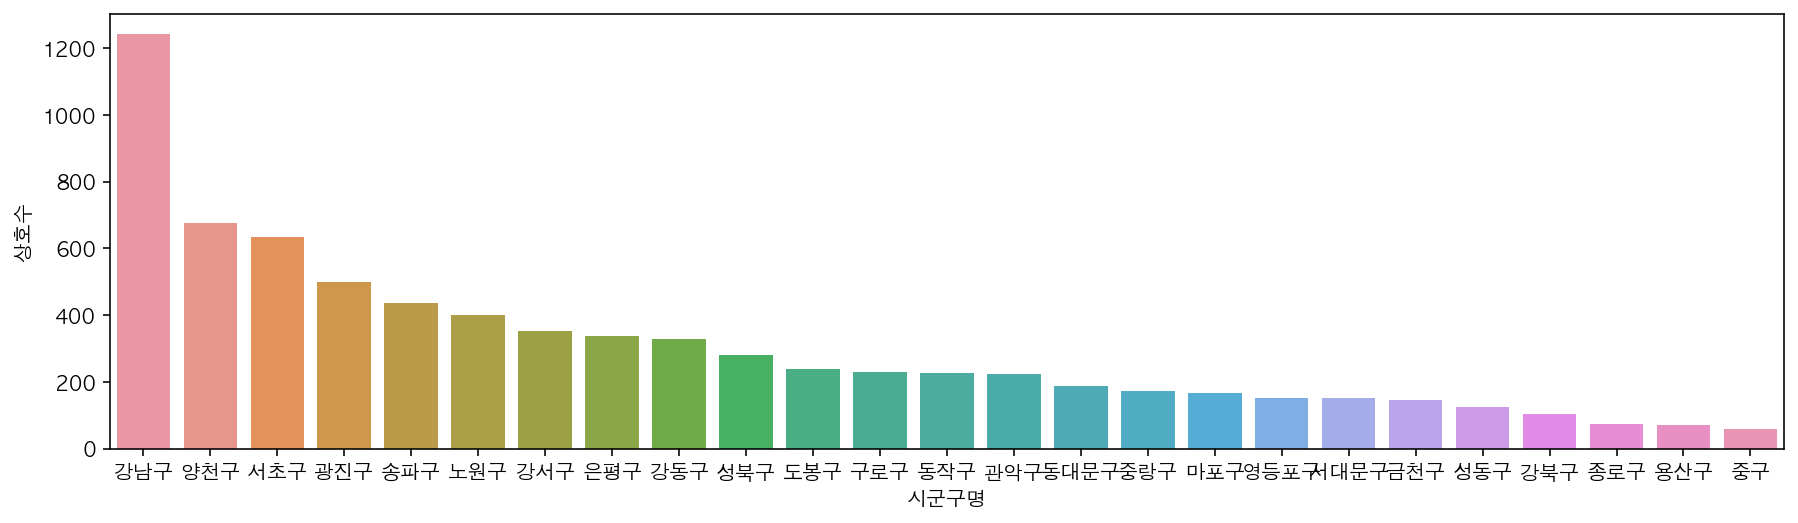

In [224]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화
academy_sub = t[t["상권업종소분류명"] == "학원-입시"].copy()

plt.figure(figsize = (15,4))
sns.barplot(
    data = academy_sub.sort_values("상호수", ascending = False),
    x = "시군구명",
    y = "상호수",
    ci = None,
)


# scatterplot 으로 영어학원 분포 분석

In [225]:
# df_academy_selected에서 상호명에 '영어'텍스트를 포함한 데이터 분류
df_academy_selected_eng = df_academy_selected.loc[df_academy_selected["상호명"].str.contains("영어")]
df_academy_selected_eng

상호명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명 시군구명  지번본번지  \
101             안재형영어    학문/교육      학원-어학  학원-외국어/어학  서울특별시  양천구    905   
308          김찬영어전문학원    학문/교육      학원-어학  학원-외국어/어학  서울특별시  강서구    981   
627             오케이영어    학문/교육  학원-보습교습입시      학원-입시  서울특별시  강동구     64   
1025            오름솔영어    학문/교육  학원-보습교습입시      학원-입시  서울특별시  양천구    907   
1366     목동ECC어린이영어교실    학문/교육      학원-어학  학원-외국어/어학  서울특별시  양천구     86   
...               ...      ...        ...        ...    ...  ...    ...   
565967     이동기영어교육연구소    학문/교육       학원기타     학원(종합)  서울특별시  동작구     59   
567506       스펙터영어교습소    학문/교육      학원-어학  학원-외국어/어학  서울특별시  강남구   1014   
567621       라이크영어교습소    학문/교육      학원-어학  학원-외국어/어학  서울특별시  마포구    422   
567623     에이미영어영어교습소    학문/교육      학원-어학  학원-외국어/어학  서울특별시  강서구    871   
573023  파워아이네트2관영어교습소    학문/교육      학원-어학  학원-외국어/어학  서울특별시  구로구    262   

        건물본번지          경도         위도  
101       133  126.875973  37.531592  
308       292  126.848757  37.550306  
627       512  127.155115  37.549030  
1025       67  126.878537  37.536383  
1366       20  126.873267  37.522673  
...       ...         ...        ...  
565967    144  126.941852  37.513414  
567506     39  127.058056  37.497161  
567621     67  126.904153  37.557320  
567623    181  126.853135  37.531219  
573023     10  126.858202  37.490469  

[1949 rows x 10 columns]

### 같은 그래프를 seaborn 으로 그리기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

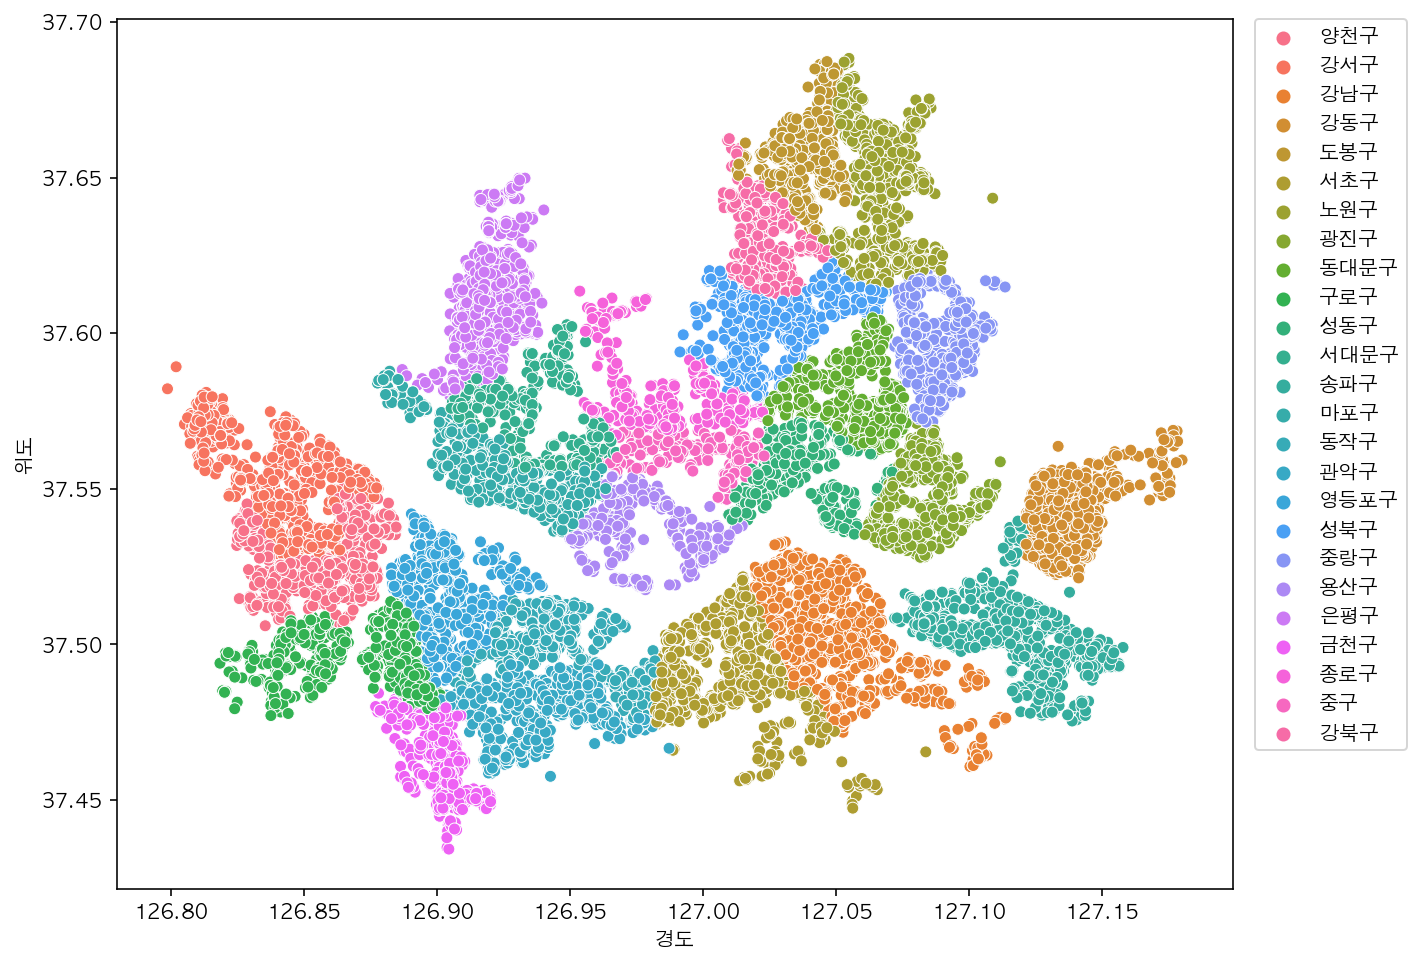

In [229]:
# scatterplot 으로 경도와 위도를 시군구명은 색상으로 분류
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = df_academy_selected,
    x = "경도",
    y = "위도",
    hue = "시군구명",
)
# 레전드를 플롯 밖으로 빼는 코드
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)


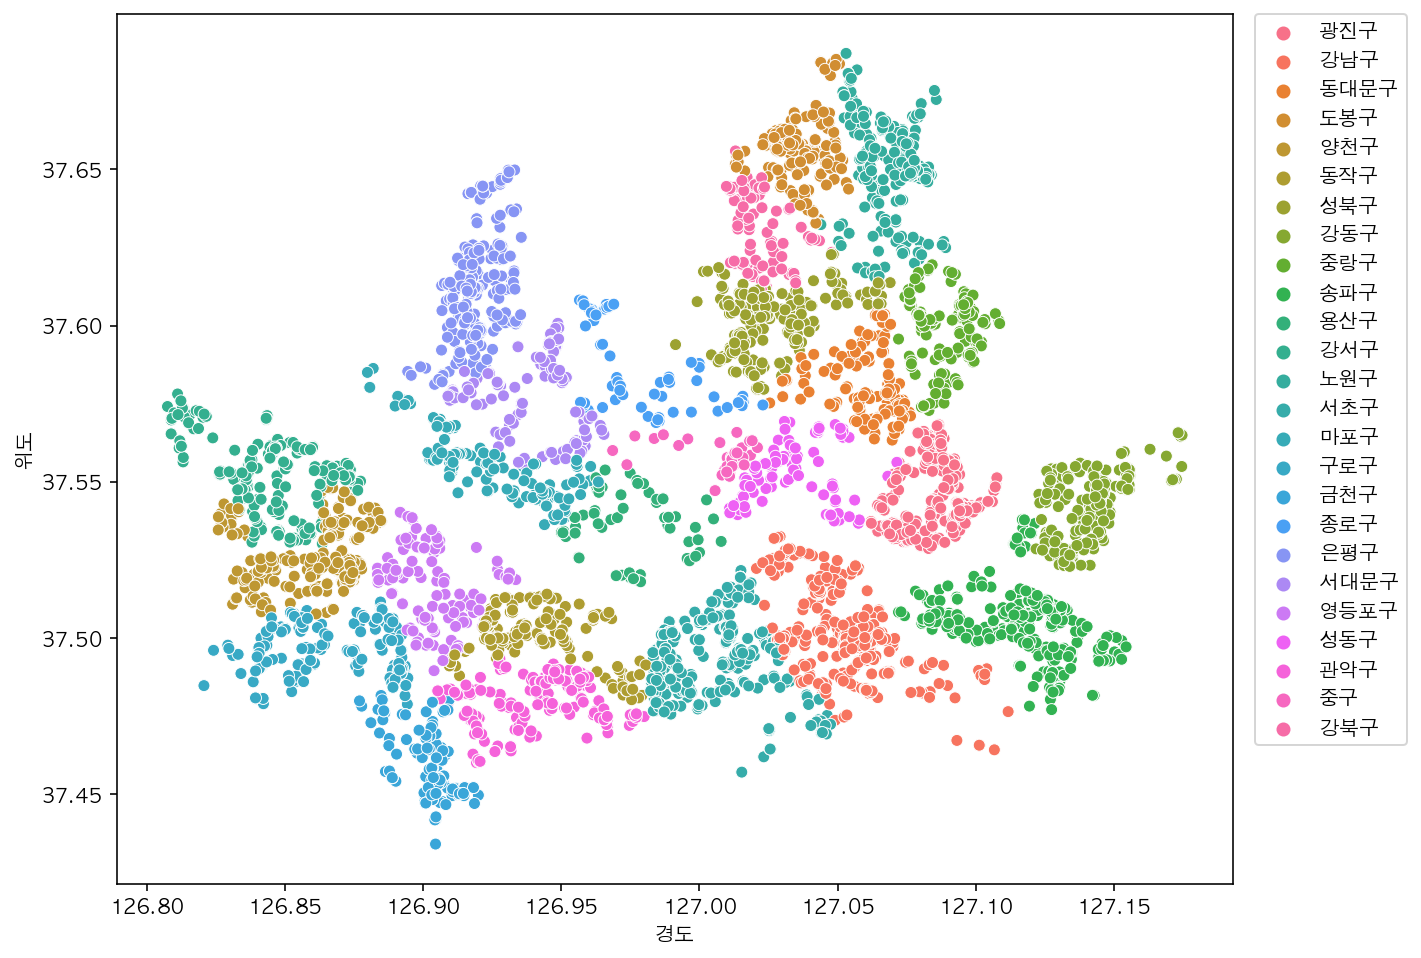

In [231]:
# ["상권업종소분류명"] == "학원-입시"] 조건 추가

plt.figure(figsize = (10,8))
sns.scatterplot(
    data = df_academy_selected.loc[df_academy_selected["상권업종소분류명"] == "학원-입시"],
    x = "경도",
    y = "위도",
    hue = "시군구명",
)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)

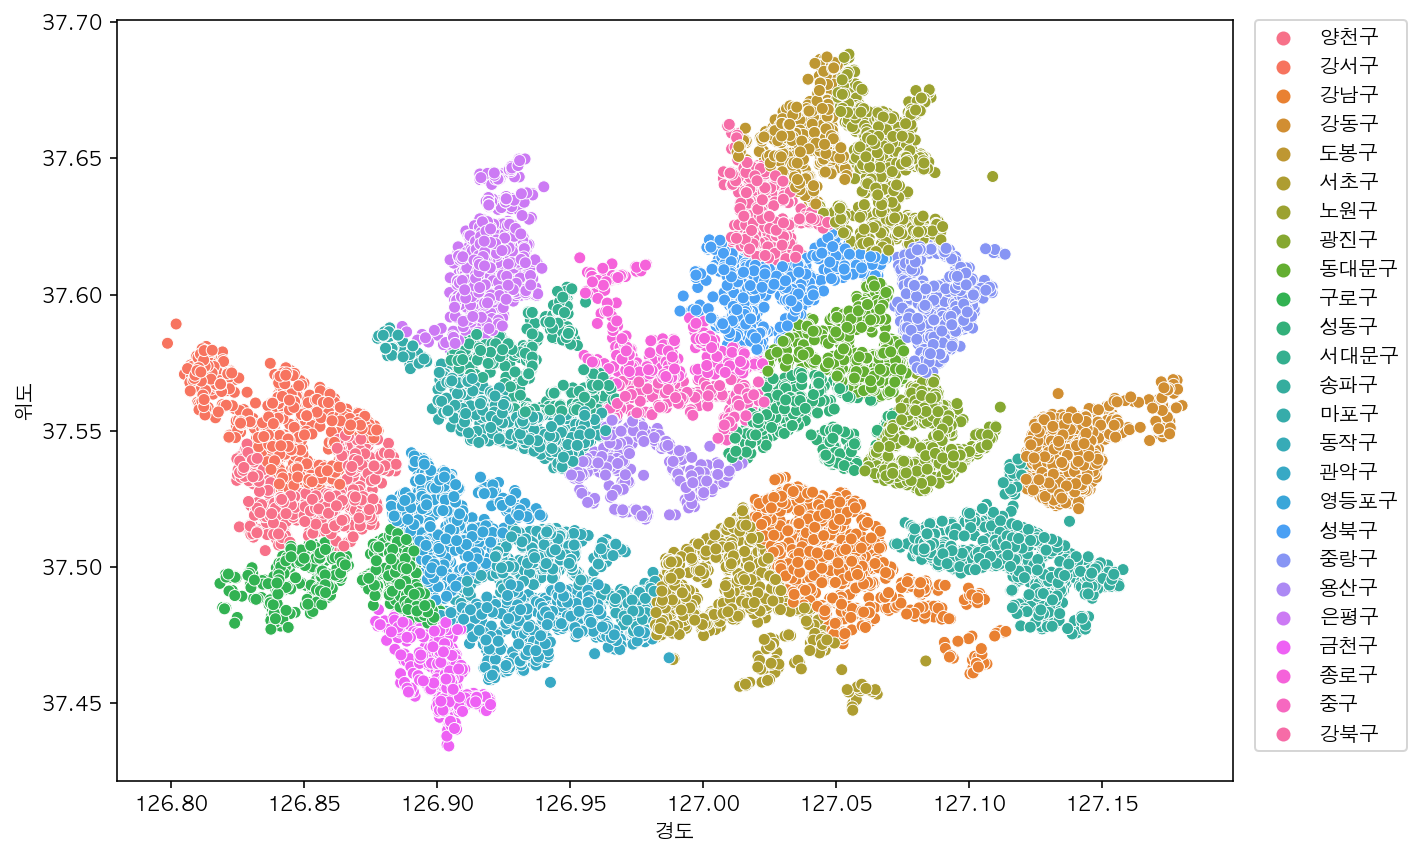

In [343]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그려봅니다.
plt.figure(figsize = (10,7))
sns.scatterplot(
    data = df_academy_selected,
    x = "경도",
    y = "위도",
    hue = "시군구명",
)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)

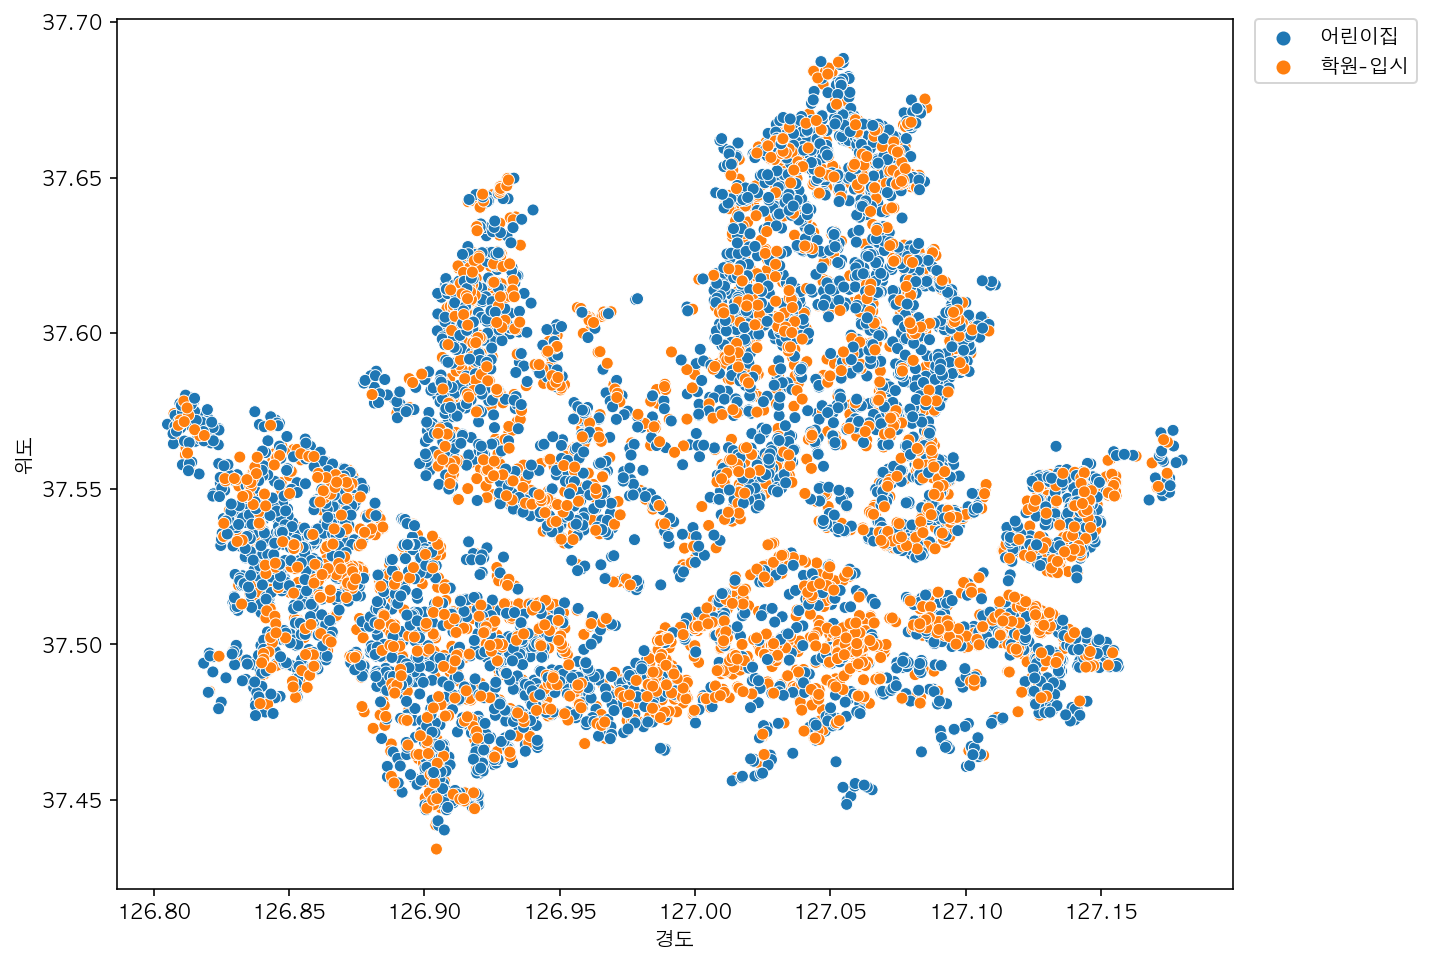

In [232]:
# "상권업종소분류명"이 "어린이집" 인 데이터화 hue로 분류해서 비교
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = df_academy_selected.loc[df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])],
    x = "경도",
    y = "위도",
    hue = "상권업종소분류명",
)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0.)


# Folium 으로 어린이집, 학원분포 분석

In [239]:
import folium

In [303]:
# 경도와 위도의 평균을 long, lat 변수에 할당
long = df_academy_selected["경도"].mean()
lat = df_academy_selected["위도"].mean()
# m에 folium 맵 생성
m = folium.Map(location = [lat, long], zoom_start = 11)
m

In [304]:
# "상권업종소분류명"에 "어린이집", "학원-입시"가 들어가는 데이터만 isin을 통해 가져와 df_m에 할당
# 지도에 표시하기에 데이터가 너무 많아 1000개만 샘플링
df_m = df_academy_selected.loc[df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])]
df_m = df_m.sample(1000)
df_m

상호명 상권업종대분류명   상권업종중분류명 상권업종소분류명    시도명 시군구명  지번본번지  건물본번지  \
336269        사랑어린이집    학문/교육       유아교육     어린이집  서울특별시  중랑구    250     12   
472191     이데아팀국어교습소    학문/교육  학원-보습교습입시    학원-입시  서울특별시  양천구    408    280   
98153   리딩키즈앤주니어보습학원    학문/교육  학원-보습교습입시    학원-입시  서울특별시  강동구    505     86   
330976       해뜨는어린이집    학문/교육       유아교육     어린이집  서울특별시  중랑구    479    123   
335771        중앙어린이집    학문/교육       유아교육     어린이집  서울특별시  광진구    615     31   
...              ...      ...        ...      ...    ...  ...    ...    ...   
3463          베스티안학원    학문/교육  학원-보습교습입시    학원-입시  서울특별시  구로구    403     55   
338413      구립약수어린이집    학문/교육       유아교육     어린이집  서울특별시   중구    366     15   
81625           A클래스    학문/교육  학원-보습교습입시    학원-입시  서울특별시  강남구   1022     28   
51109         지원에듀학원    학문/교육  학원-보습교습입시    학원-입시  서울특별시  중랑구    513    211   
59015      생가하는두꺼비수학    학문/교육  학원-보습교습입시    학원-입시  서울특별시  서초구    929     41   

                경도         위도  
336269  127.077787  37.605857  
472191  126.868228  37.525211  
98153   127.128119  37.554312  
330976  127.098095  37.602941  
335771  127.078075  37.532928  
...            ...        ...  
3463    126.855691  37.490562  
338413  127.009218  37.552320  
81625   127.058729  37.497670  
51109   127.096232  37.595007  
59015   126.989017  37.501951  

[1000 rows x 10 columns]

In [305]:
# for문으로 데이터프레임을 돌며 원하는 값을 할당 
# 'df_m.loc[인덱스넘버, 칼럼명]' 구조로 map에 마킹할 정보를 가져올 수 있음
for i in df_m.index:
    tooltip = df_m.loc[i, "상호명"] + "-" + df_m.loc[i, "시군구명"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    folium.Marker([lat,long],tooltip=tooltip).add_to(m)
m
#마커의 사이즈가 너무 크고 마커만으로 학원과 어린이집을 구분할 수 없음

In [302]:
# 맵 초기화, 맵 위치 조정, 더 심플한 타일로 변경
m = folium.Map(location = [lat+0.08,long+0.07],tiles='Stamen Toner', zoom_start = 11)

# 일반마커 > 서클마커로 변경, 어린이집과 학원 색상 구분
for i in df_m.index:
    tooltip = df_m.loc[i, "상호명"] + "-" + df_m.loc[i, "시군구명"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    color = "red"
    if df_m.loc[i, "상권업종소분류명"] == '어린이집':
        color = "blue"
    folium.CircleMarker([lat,long],
                        tooltip=tooltip,
                        color = color,
                        radius = 3,
                        weight = 2, 
                        opacity =0.6
                       ).add_to(m)
m
# 마커 사이즈가 작아져 

In [381]:
# html 파일로 저장
m.save("index.html")
